In [50]:
from eiscirc import ImpedanceModel, ImpedanceFitter
import numpy as np
import matplotlib.pyplot as plt

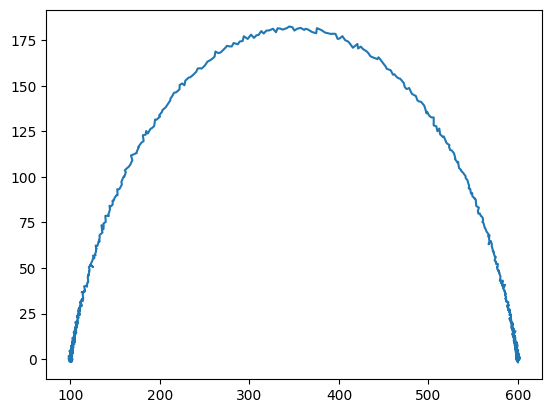

In [55]:
# Create a circuit and generate synthetic data
model = ImpedanceModel("R0-CPE1//R1")
true_params = {"R0": 100,"CPE1": (5e-6, 0.8), "R1": 500}
#model.set_params(**true_params)

frequencies = np.logspace(-3, 6, 1000)  # 1mHz to 1MHz
omega = 2 * np.pi * frequencies
Z_ideal = model.impedance(omega, true_params)

noise = 0.8 * np.random.normal(size=Z_ideal.shape)  # 80% noise
Z_data = Z_ideal + noise
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):])

Fitted parameters: {'R0': np.float64(88.25783467986615), 'CPE1_alpha': np.float64(0.6716739899968227), 'R1': np.float64(522.265577670672)}
88.25783467986615 522.265577670672 1e-06
namespace(R0=np.float64(88.25783467986615), CPE1=namespace(value=1e-06, alpha=np.float64(0.6716739899968227)), R1=np.float64(522.265577670672))


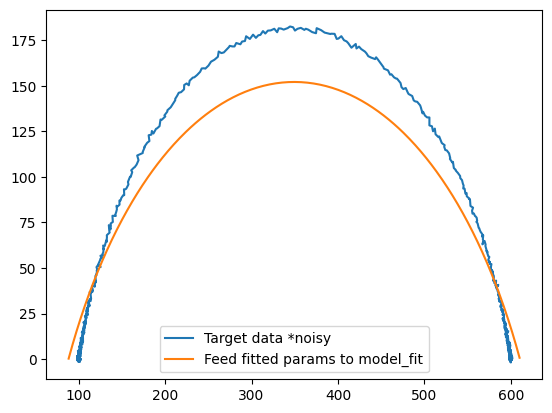

In [65]:
model_fit = ImpedanceModel("R0-CPE1//R1")
fitter = ImpedanceFitter(model, frequencies, Z_data)
fitter.set_bounds(R0=(1, 1e4), CPE1_alpha=(0.1, 0.9))
fitter.set_initial_guess(R0=80, CPE1_value=1e-4)
fitter.set_fixed_params(CPE1_value=1e-6)

fitted_params = fitter.fit()
print("Fitted parameters:", fitted_params)

#plt.plot(model_fit.Z_real,-model_fit.Z_imag, label = "From model_fit.Z_real")
plt.plot (Z_data[:len(omega)], -Z_data[len(omega):], label = "Target data *noisy")

fitted_params_full = fitter.get_full_parameters()
model_fit.set_params(**fitted_params_full)
print (model_fit.params.R0,model_fit.params.R1,model_fit.params.CPE1.value)
print (model_fit.param_values)

#Z_fit = model_fit.impedance(omega, *fitted_params_full)
Z_fit = model_fit.impedance(omega)
plt.plot(model_fit.Z_real,-model_fit.Z_imag, label = "Feed fitted params to model_fit")

plt.legend()